# fitcecoc
Fit multiclass models for support vector machines or other classifiers

## Syntax
Mdl = fitcecoc(X,Y)

Mdl = fitcecoc(X,Y,Name,Value)

##Description
Mdl = fitcecoc(X,Y) returns a full, trained error-correcting output codes (ECOC) multiclass model using the predictors X and the class labels Y. By default, fitcecoc uses K(K – 1)/2 binary support vector machine (SVM) models using the one-versus-one coding design, where K is the number of unique class labels (levels). Mdl is a ClassificationECOC model.

Mdl = fitcecoc(X,Y,Name,Value) returns an ECOC model with additional options specified by one or more Name,Value pair arguments.

For example, specify different binary learners, a different coding design, or to cross validate. It is good practice to cross validate using the Kfold Name,Value pair argument. The cross-validation results determine how well the ECOC classifier generalizes.

##Examples

### Train a Multiclass Model Using SVM Learners
Train an error-correcting output codes (ECOC) multiclass model using support vector machine (SVM) binary learners.

Load Fisher's iris data set.

In [6]:
load fisheriris
X = meas;
Y = species;

Train an ECOC multiclass model using the default options.

In [7]:
Mdl = fitcecoc(X,Y)

Mdl = 

  ClassificationECOC
    PredictorNames: {'x1'  'x2'  'x3'  'x4'}
      ResponseName: 'Y'
        ClassNames: {'setosa'  'versicolor'  'virginica'}
    ScoreTransform: 'none'
    BinaryLearners: {3x1 cell}
        CodingName: 'onevsone'

Mld is a ClassificationECOC model. By default, fitcecoc uses SVM binary learners, and uses a one-versus-one coding design. You can access Mdl properties using dot notation.

Display the coding design matrix.

In [10]:
Mdl.ClassNames
CodingMat = Mdl.CodingMatrix

ans = 

    'setosa'
    'versicolor'
    'virginica'


CodingMat =

     1     1     0
    -1     0     1
     0    -1    -1

A one-versus-one coding design on three classes yields three binary learners. Columns of CodingMat correspond to learners and rows correspond to classes. The class order corresponds to the order in Mdl.ClassNames. For example, CodingMat(:,1) is [1; -1; 0], and indicates that the software trains the first SVM binary learner using all observations classified as 'setosa' and 'versicolor'. Since 'setosa' corresponds to 1, it is the positive class, and since 'versicolor' corresponds to -1, it is the negative class.

You can access each binary learner using cell indexing and dot notation.

In [11]:
Mdl.BinaryLearners{1}                % The first binary learner
Mdl.BinaryLearners{1}.SupportVectors % Support vector indices

ans = 

  classreg.learning.classif.CompactClassificationSVM
      PredictorNames: {'x1'  'x2'  'x3'  'x4'}
        ResponseName: 'Y'
          ClassNames: [-1 1]
      ScoreTransform: 'none'
                Beta: [4x1 double]
                Bias: 1.4505
    KernelParameters: [1x1 struct]



ans =

     []

Compute the in-sample classification error.

In [5]:
isLoss = resubLoss(Mdl)

isLoss =

    0.0067

The classification error is small, but the classifier might have been overfit. You can cross validate the classifier using crossval.

###Cross Validate an ECOC Classifier
Train a one-versus-one ECOC classifier using binary SVM learners.

Load Fisher's iris data set.

In [12]:
load fisheriris
X = meas;
Y = species;
rng(1); % For reproducibility

Create an SVM template. It is good practice to standardize the predictors.

In [13]:
t = templateSVM('Standardize',1)

t = 

Fit template for classification SVM.

                     Alpha: [0x1 double]
             BoxConstraint: []
                 CacheSize: []
             CachingMethod: ''
    DeltaGradientTolerance: []
              GapTolerance: []
              KKTTolerance: []
            IterationLimit: []
            KernelFunction: ''
               KernelScale: []
              KernelOffset: []
     KernelPolynomialOrder: []
                  NumPrint: []
                        Nu: []
           OutlierFraction: []
           ShrinkagePeriod: []
                    Solver: ''
           StandardizeData: 1
        SaveSupportVectors: []
            VerbosityLevel: []
                    Method: 'SVM'
                      Type: 'classification'

t is an SVM template. All of its properties are empty, except for StandardizeData, Method, and Type. When the software trains the ECOC classifier, it sets the applicable properties to their default values.

Train the ECOC classifier. It is good practice to specify the class order.

In [14]:
Mdl = fitcecoc(X,Y,'Learners',t,...
    'ClassNames',{'setosa','versicolor','virginica'});

Mdl is a ClassificationECOC classifier. You can access its properties using dot notation.

Cross validate Mdl using 10-fold cross validation.

In [15]:
CVMdl = crossval(Mdl);

CVMdl is a ClassificationPartitionedECOC cross-validated ECOC classifier.

Estimate the generalization error.

In [16]:
oosLoss = kfoldLoss(CVMdl)

oosLoss =

    0.0400

The out-of-sample classification error is 4%, which indicates that the ECOC classifier generalizes fairly well.

###Estimate Posterior Probabilities Using ECOC Classifiers

Load Fisher's iris data set. Train the classifier using the petal dimension as predictors

In [17]:
load 'fisheriris'
X = meas(:,3:4);
Y = species;
rng(1); % For reproducibility

Create an SVM template, and specify the Gaussian kernel. It is good practice to standardize the predictors.

In [18]:
t = templateSVM('Standardize',1,'KernelFunction','gaussian');

t is an SVM template. Most of its properties are empty. When the software trains the ECOC classifier, it sets the applicable properties to their default values.

Train the ECOC classifier using the SVM template. Transform classification scores to class posterior probabilities (which are returned by predict or resubPredict) using the 'FitPosterior' name-value pair argument. Display diagnostic messages during the training using the 'Verbose' name-value pair argument. It is good practice to specify the class order.

In [19]:
Mdl = fitcecoc(X,Y,'Learners',t,'FitPosterior',1,...
    'ClassNames',{'setosa','versicolor','virginica'},...
    'Verbose',2);

Training binary learner 1 (SVM) out of 3 with 50 negative and 50 positive observations.
Negative class indices: 2
Positive class indices: 1

Fitting posterior probabilities for learner 1 (SVM).
Training binary learner 2 (SVM) out of 3 with 50 negative and 50 positive observations.
Negative class indices: 3
Positive class indices: 1

Fitting posterior probabilities for learner 2 (SVM).
Training binary learner 3 (SVM) out of 3 with 50 negative and 50 positive observations.
Negative class indices: 3
Positive class indices: 2

Fitting posterior probabilities for learner 3 (SVM).

Mdl is a ClassificationECOC model. The same SVM template applies to each binary learner, but you can adjust options for each binary learner by passing in a cell vector of templates.

Predict the in-sample labels and class posterior probabilities. Display diagnostic messages during the computation of labels and class posterior probabilities using the 'Verbose' name-value pair argument.

In [20]:
[label,~,~,Posterior] = resubPredict(Mdl,'Verbose',1);
Mdl.BinaryLoss

Predictions from all learners have been computed.
Loss for all observations has been computed.
Computing posterior probabilities...

ans =

quadratic

The software assigns an observation to the class that yields the smallest average binary loss. Since all binary learners are computing posterior probabilities, the binary loss function is quadratic.

Display a random set of results.

In [21]:
idx = randsample(size(X,1),10,1);
Mdl.ClassNames
table(Y(idx),label(idx),Posterior(idx,:),...
    'VariableNames',{'TrueLabel','PredLabel','Posterior'})

ans = 

    'setosa'
    'versicolor'
    'virginica'


ans = 

     TrueLabel       PredLabel                    Posterior               
    ____________    ____________    ______________________________________

    'virginica'     'virginica'      0.0039321     0.0039869       0.99208
    'virginica'     'virginica'       0.017067      0.018263       0.96467
    'virginica'     'virginica'       0.014948      0.015856        0.9692
    'versicolor'    'versicolor'    2.2197e-14       0.87317       0.12683
    'setosa'        'setosa'             0.999    0.00025091    0.00074639
    'versicolor'    'virginica'     2.2195e-14      0.059429       0.94057
    'versicolor'    'versicolor'    2.2194e-14       0.97001      0.029986
    'setosa'        'setosa'             0.999     0.0002499    0.00074741
    'versicolor'    'versicolor'     0.0085646       0.98259      0.008849
    'setosa'        'setosa'             0.999    0.00025013    0.00074718

The columns of Posterior correspond to the class order of Mdl.ClassNames.

Define a grid of values in the observed predictor space. Predict the posterior probabilities for each instance in the grid.

In [22]:
xMax = max(X);
xMin = min(X);

x1Pts = linspace(xMin(1),xMax(1));
x2Pts = linspace(xMin(2),xMax(2));
[x1Grid,x2Grid] = meshgrid(x1Pts,x2Pts);

[~,~,~,PosteriorRegion] = predict(Mdl,[x1Grid(:),x2Grid(:)]);

For each coordinate on the grid, plot the maximum class posterior probability among all classes.

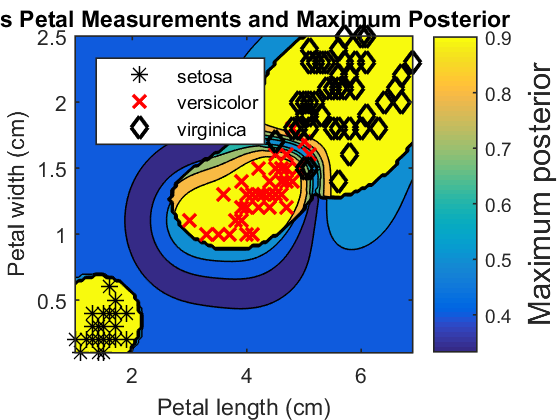

In [23]:
figure;
contourf(x1Grid,x2Grid,...
        reshape(max(PosteriorRegion,[],2),size(x1Grid,1),size(x1Grid,2)));
h = colorbar;
h.YLabel.String = 'Maximum posterior';
h.YLabel.FontSize = 15;
hold on
gh = gscatter(X(:,1),X(:,2),Y,'krk','*xd',8);
gh(2).LineWidth = 2;
gh(3).LineWidth = 2;

title 'Iris Petal Measurements and Maximum Posterior';
xlabel 'Petal length (cm)';
ylabel 'Petal width (cm)';
axis tight
legend(gh,'Location','NorthWest')
hold off

### Train ECOC Classifiers Using Ensembles and Parallel Computing
Train a one-versus-all ECOC classifier using a GentleBoost ensemble of decision trees with surrogate splits. Estimate the classification error using 10-fold cross validation.

Load and inspect the arrhythmia data set.

In [24]:
load arrhythmia
[n,p] = size(X)
isLabels = unique(Y);
nLabels = numel(isLabels)
tabulate(categorical(Y))

n =

   452


p =

   279


nLabels =

    13

  Value    Count   Percent
      1      245     54.20%
      2       44      9.73%
      3       15      3.32%
      4       15      3.32%
      5       13      2.88%
      6       25      5.53%
      7        3      0.66%
      8        2      0.44%
      9        9      1.99%
     10       50     11.06%
     14        4      0.88%
     15        5      1.11%
     16       22      4.87%

There are 279 predictors, and a relatively small sample size of 452. There are 16 distinct labels, but only 13 are represented in the response (Y), and each label describes various degrees of arrhythmia. 54.20% of the observations are in class 1.

Create an ensemble template. You must specify at least three arguments: a method, a number of learners, and the type of learner. For this example, specify 'GentleBoost' for the method, 100 for the number of learners, and a decision tree template that uses surrogate splits since there are missing observations.

In [25]:
tTree = templateTree('surrogate','on');
tEnsemble = templateEnsemble('GentleBoost',100,tTree);

tEnsemble is a template object. Most of its properties are empty, but the software fills them with their default values during training.



Train a one-versus-all ECOC classifier using the ensembles of decision trees as binary learners. If you have a Parallel Computing Toolbox™ license, then you can speed up the computation by specifying to use parallel computing. This sends each binary learner to a worker in the pool (the number of workers depends on your system configuration). Also, specify that the prior probabilities are 1/K, where K = 13, which is the number of distinct classes.

In [26]:
pool = parpool; % Invoke workers
options = statset('UseParallel',1);
Mdl = fitcecoc(X,Y,'Coding','onevsall','Learners',tEnsemble,...
                'Prior','uniform','Options',options);

Starting parallel pool (parpool) using the 'local' profile ... connected to 4 workers.

Mdl is a ClassificationECOC model.



Cross validate the ECOC classifier using 10-fold cross validation.



In [27]:
CVMdl = crossval(Mdl,'Options',options);

[Warning: One or more folds do not contain points from all the groups.] 
[> In cvpartition>stra_kfoldcv (line 535)
  In cvpartition/rerandom (line 461)
  In cvpartition (line 197)
  In classreg.learning.generator.Partitioner (line 39)
  In classreg.learning.modelparams.EnsembleParams/makeGenerator (line 348)
  In classreg.learning.modelparams.EnsembleParams/fillDefaultParams (line 580)
  In classreg.learning.modelparams.ModelParams/fillIfNeeded (line 48)
  In classreg.learning.classif.FullClassificationModel (line 35)
  In classreg.learning.classif.ClassificationEnsemble (line 66)
  In classreg.learning.partition.ClassificationPartitionedModel (line 159)
  In classreg.learning.partition.ClassificationPartitionedECOC (line 161)
  In classreg.learning.FitTemplate/fit (line 251)
  In ClassificationECOC/crossval (line 240)
  In pymat_eval (line 31)
  In matlabserver (line 24)]

CVMdl is a ClassificationPartitionedECOC model. The warning indicates that some classes are not represented while the software trains at least one fold. Therefore, those folds cannot predict labels for the missing classes. You can inspect the results of a fold using cell indexing and dot notation, e.g., access the results of the first fold by entering CVMdl.Trained{1}. Your results might vary.

Use the cross-validated ECOC classifier to predict out-of-fold labels. You can compute the confusion matrix using confusionmat. However, if you have a Neural Network Toolbox™ license, you can plot the confusion matrix using plotconfusion. The input arguments of plotconfusion are not vectors of the true and predicted labels like confusionmat, but indicator matrices of the true and predicted labels. Both start as K-by-n matrices of 0s. If observation j has label index k (or has predicted label k), then element (k,j) of the true label indicator matrix (or predicted label indicator matrix) is 1. You can convert label indices returned by predict, resubPredict, or kfoldPredict to label indicator matrices using linear indexing. For details on linear indexing, see sub2ind and ind2sub.



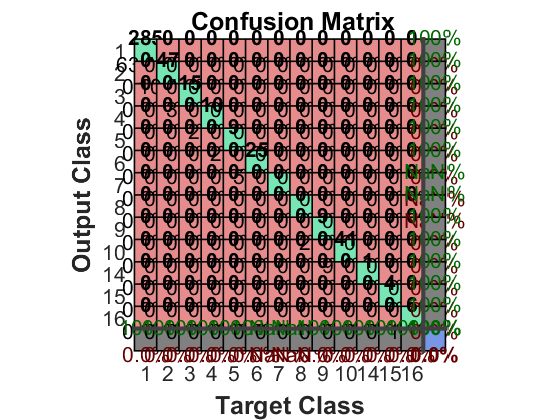

In [28]:
oofLabel = kfoldPredict(CVMdl,'Options',options);
ConfMat = confusionmat(Y,oofLabel);

% Convert the integer label vector to a class-identifier matrix.
[~,grp] = ismember(oofLabel,isLabels);
oofLabelMat = zeros(nLabels,n);
idxLinear = sub2ind([nLabels n],grp,(1:n)');
oofLabelMat(idxLinear) = 1; % Flags the row corresponding to the class
YMat = zeros(nLabels,n);
idxLinearY = sub2ind([nLabels n],grp,(1:n)');
YMat(idxLinearY) = 1;

figure;
plotconfusion(YMat,oofLabelMat);
h = gca;
h.XTickLabel = [num2cell(isLabels); {''}];
h.YTickLabel = [num2cell(isLabels); {''}];